In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [23]:
start = '2001-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'stooq', start, end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


In [67]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-07-02,1.53333,1.54000,1.24733,1.28000,77127105.0
2010-07-01,1.66667,1.72800,1.35133,1.46400,123447945.0
2010-06-30,1.71933,2.02800,1.55333,1.58867,257915910.0
2010-06-29,1.26667,1.66667,1.16933,1.59267,281749140.0
2010-06-28,1.13333,1.13333,1.13333,1.13333,NaN


In [68]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-12-31,27.0000,28.0860,26.8053,27.8887,154386840.0
1,2019-12-30,28.5860,28.6000,27.2840,27.6467,189018975.0
2,2019-12-27,29.0000,29.0207,28.4073,28.6920,149352405.0
3,2019-12-26,28.5273,28.8987,28.4233,28.7293,159724335.0
4,2019-12-24,27.8907,28.3647,27.5127,28.3500,120820800.0


In [69]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.0000,28.0860,26.8053,27.8887,154386840.0
1,28.5860,28.6000,27.2840,27.6467,189018975.0
2,29.0000,29.0207,28.4073,28.6920,149352405.0
3,28.5273,28.8987,28.4233,28.7293,159724335.0
4,27.8907,28.3647,27.5127,28.3500,120820800.0


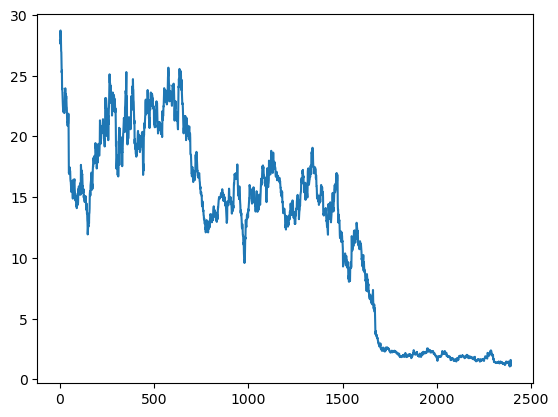

In [70]:
plt.plot(df.Close)

In [71]:
df

,Open,High,Low,Close,Volume
0,27.00000,28.08600,26.80530,27.88870,154386840.0
1,28.58600,28.60000,27.28400,27.64670,189018975.0
2,29.00000,29.02070,28.40730,28.69200,149352405.0
3,28.52730,28.89870,28.42330,28.72930,159724335.0
4,27.89070,28.36470,27.51270,28.35000,120820800.0
...,...,...,...,...,...
2389,1.53333,1.54000,1.24733,1.28000,77127105.0
2390,1.66667,1.72800,1.35133,1.46400,123447945.0
2391,1.71933,2.02800,1.55333,1.58867,257915910.0
2392,1.26667,1.66667,1.16933,1.59267,281749140.0


In [72]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    1.415586
2390    1.407960
2391    1.403186
2392    1.399186
2393    1.390860
Name: Close, Length: 2394, dtype: float64

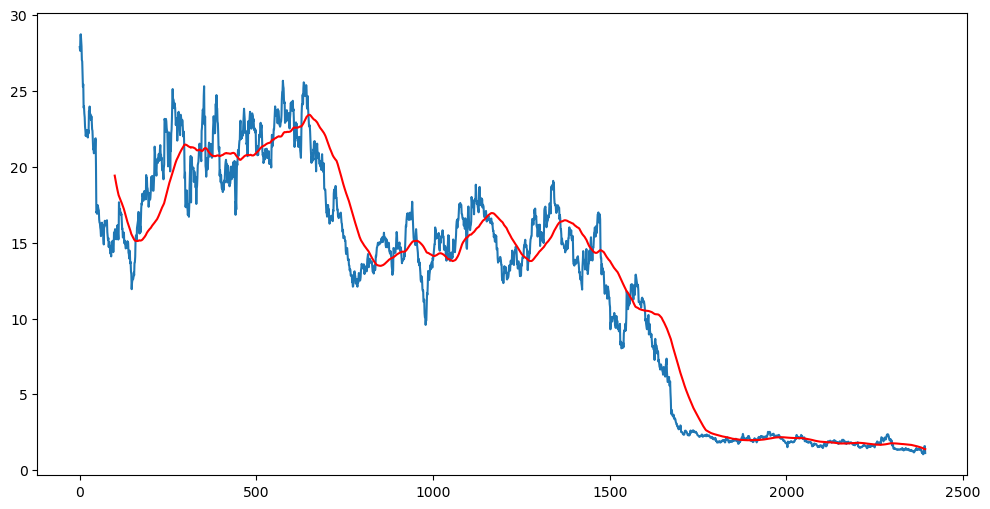

In [73]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [74]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    1.584217
2390    1.583193
2391    1.582610
2392    1.582193
2393    1.579550
Name: Close, Length: 2394, dtype: float64

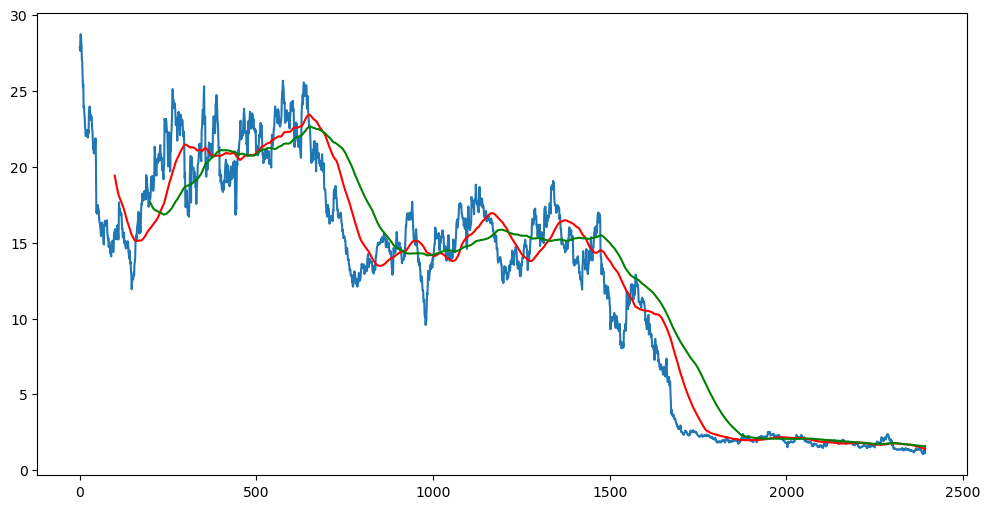

In [75]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [76]:
df.shape

(2394, 5)

In [77]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1675, 1)
(719, 1)


In [78]:
data_training.head()

,Close
0,27.8887
1,27.6467
2,28.6920
3,28.7293
4,28.3500


In [79]:
data_testing.head()

,Close
1675,3.70067
1676,3.96667
1677,3.63667
1678,3.60733
1679,3.55200


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [81]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.9663894 ],
       [0.95671326],
       [0.99850859],
       ...,
       [0.05589771],
       [0.03627913],
       [0.        ]])

In [82]:
data_training_array.shape

(1675, 1)

In [83]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [91]:
x_train.shape


(1575, 100, 1)

In [ ]:
#ML Model

In [92]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [93]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [95]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
50/50 [==============================] - 11s 145ms/step - loss: 0.0549
Epoch 2/50
50/50 [==============================] - 7s 137ms/step - loss: 0.0141
Epoch 3/50
50/50 [==============================] - 7s 137ms/step - loss: 0.0127
Epoch 4/50
50/50 [==============================] - 7s 139ms/step - loss: 0.0118
Epoch 5/50
50/50 [==============================] - 7s 138ms/step - loss: 0.0110
Epoch 6/50
50/50 [==============================] - 7s 138ms/step - loss: 0.0104
Epoch 7/50
50/50 [==============================] - 7s 138ms/step - loss: 0.0099
Epoch 8/50
50/50 [==============================] - 7s 139ms/step - loss: 0.0090
Epoch 9/50
50/50 [==============================] - 7s 140ms/step - loss: 0.0085
Epoch 10/50
50/50 [==============================] - 7s 139ms/step - loss: 0.0079
Epoch 11/50
50/50 [==============================] - 7s 139ms/step - loss: 0.0080
Epoch 12/50
50/50 [==============================] - 7s 142ms/step - loss: 0.0069
Epoch 13/50
50/50 [=====

In [96]:
model.save('keras_model.h5')

In [115]:
data_testing.head()

,Close
1675,3.70067
1676,3.96667
1677,3.63667
1678,3.60733
1679,3.55200


In [121]:
past_100_days = data_training.tail(100)

In [122]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\nayee\AppData\Local\Temp\ipykernel_11924\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [123]:
final_df.head()

,Close
0,12.7267
1,12.5760
2,12.3493
3,12.1553
4,12.0740


In [124]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.        ],
       [0.98709027],
       [0.96767   ],
       [0.95105098],
       [0.94408641],
       [0.9571075 ],
       [0.92586545],
       [0.8590467 ],
       [0.85910667],
       [0.86110266],
       [0.85516607],
       [0.85167951],
       [0.84362699],
       [0.85990335],
       [0.82752196],
       [0.86332996],
       [0.88024024],
       [0.88418083],
       [0.87458634],
       [0.87492901],
       [0.85813865],
       [0.86036594],
       [0.86356125],
       [0.84762755],
       [0.8340325 ],
       [0.80696234],
       [0.75419523],
       [0.76401845],
       [0.73729095],
       [0.72072932],
       [0.70742211],
       [0.70565227],
       [0.74031749],
       [0.75145395],
       [0.78355008],
       [0.78629136],
       [0.67635481],
       [0.72158597],
       [0.73603424],
       [0.69788502],
       [0.68389334],
       [0.67664008],
       [0.66213441],
       [0.67858211],
       [0.64871327],
       [0.61833044],
       [0.60479536],
       [0.610

In [125]:
input_data.shape

(819, 1)

In [130]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [131]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(719, 100, 1)
(719,)


In [132]:
#making the predictions

y_predicted = model.predict(x_test)

23/23 [==============================] - 1s 36ms/step


In [133]:
y_predicted.shape

(719, 1)

In [134]:
y_test

array([0.22678455, 0.24957146, 0.22130199, 0.21878858, 0.21404873,
       0.21810326, 0.22352928, 0.20216955, 0.20673893, 0.19777237,
       0.20108503, 0.19640172, 0.18292404, 0.17801201, 0.16933156,
       0.17013082, 0.15705319, 0.15962314, 0.1587091 , 0.14882934,
       0.14106209, 0.14865801, 0.14603067, 0.14968599, 0.1444887 ,
       0.16299235, 0.16065112, 0.12615637, 0.12769834, 0.12598504,
       0.12410041, 0.11890311, 0.11541997, 0.11507731, 0.11010873,
       0.11050793, 0.11130805, 0.12021721, 0.13238165, 0.13318091,
       0.13306697, 0.12946904, 0.1280984 , 0.12501446, 0.11907444,
       0.11296395, 0.10765272, 0.1086807 , 0.11022267, 0.10639601,
       0.10611075, 0.1159905 , 0.11056533, 0.12986824, 0.13409495,
       0.12130173, 0.1284976 , 0.12935425, 0.12615637, 0.12918292,
       0.13386623, 0.13523687, 0.13346617, 0.12752701, 0.12529972,
       0.1284976 , 0.12398648, 0.12404301, 0.12649903, 0.12695563,
       0.12095907, 0.12101647, 0.11536257, 0.11073666, 0.10691

In [135]:
y_predicted

array([[0.37816238],
       [0.37030193],
       [0.3622771 ],
       [0.35312372],
       [0.34296888],
       [0.33179042],
       [0.31996402],
       [0.3078004 ],
       [0.29575336],
       [0.28416732],
       [0.273287  ],
       [0.26329833],
       [0.25434607],
       [0.24650283],
       [0.23973407],
       [0.23389243],
       [0.22880611],
       [0.22425938],
       [0.22007346],
       [0.21612045],
       [0.21228239],
       [0.20846038],
       [0.20462167],
       [0.20077094],
       [0.19695464],
       [0.19321752],
       [0.18970263],
       [0.18656091],
       [0.1837093 ],
       [0.18100214],
       [0.17831933],
       [0.17558204],
       [0.17274451],
       [0.16978501],
       [0.16670792],
       [0.16352674],
       [0.16026996],
       [0.15698308],
       [0.15375356],
       [0.15072031],
       [0.14801401],
       [0.14573401],
       [0.14392975],
       [0.14260203],
       [0.14168295],
       [0.14104038],
       [0.14051345],
       [0.139

In [136]:
scaler.scale_

array([0.08566507])

In [137]:
scale_factor = 1/0.08566507
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

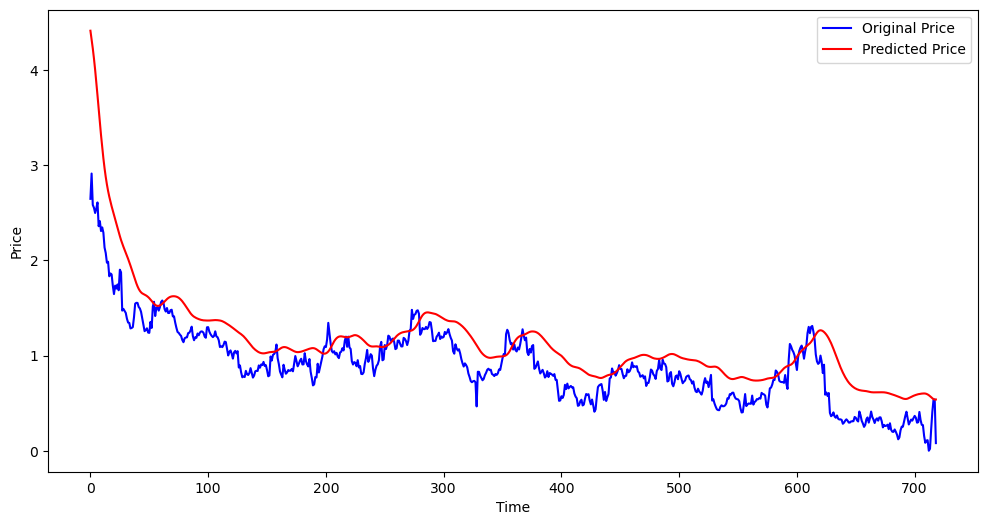

In [138]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()